# ANALYTICS VIDHYA - Loan Prediction Competition

### TASK - 
**Predicting which customers will be approved for granting loans to and which customers' loan requests will be rejected**

**METRIC TO EVALUATE - Accuracy**

# Importing the pre-requisite packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
data = pd.read_csv("train_ctrUa4K.csv")

# Understanding the dataset

- Variable :	Description
- Loan_ID	: Unique Loan ID
- Gender :	Male/ Female
- Married	: Applicant married (Y/N)
- Dependents :	Number of dependents
- Education :	Applicant Education (Graduate/ Under Graduate)
- Self_Employed :	Self employed (Y/N)
- ApplicantIncome :	Applicant income
- CoapplicantIncome :	Coapplicant income
- LoanAmount :	Loan amount in thousands
- Loan_Amount_Term :	Term of loan in months
- Credit_History :	credit history meets guidelines
- Property_Area :	Urban/ Semi Urban/ Rural
- Loan_Status :	(Target) Loan approved (Y/N)

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.select_dtypes(include=np.number).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [8]:
data.select_dtypes(include=np.object).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


##### Inferences - 
- The train sample contains 13 features and 614 records.
- The dataset contain missing values in several columns.
- All numberical features appear correctly identified. However, Credit History needs to be checked.
- All categorical features correctly identified. However, Dependents might need to be checked.

# Data Cleaning

In [9]:
data.Credit_History.unique()

array([ 1.,  0., nan])

**Credit History appears to be a binary column with 1 standing for credit history fails to meet guidelines and 0 means met guidelines. It needs to be converted to categorcial**

**However, we cannot encode the 1 and 0 as we dont exactly know what they stand for**

In [10]:
data.Credit_History = data.Credit_History.astype("object")

In [11]:
data.Credit_History.unique()

array([1.0, 0.0, nan], dtype=object)

In [12]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

**The categories in the dependents features appears like numerical but has a category of "3+". We will create better categories to make its nature and values clear**

In [13]:
for i in data.index:
    if data.loc[i,"Dependents"] == "0":
        data.loc[i,"Dependents"] = "No Dependents"
    elif data.loc[i,"Dependents"] == "1":
        data.loc[i,"Dependents"] = "1 Dependent"
    elif data.loc[i,"Dependents"] == "2":
        data.loc[i,"Dependents"] = "2 Dependents"
    elif data.loc[i,"Dependents"] == "3+":
        data.loc[i,"Dependents"] = "3 or more Dependents"
    

In [14]:
data.Dependents.unique()

array(['No Dependents', '1 Dependent', '2 Dependents',
       '3 or more Dependents', nan], dtype=object)

In [15]:
for i in data.select_dtypes(include=np.object).columns[1:]:
    print(i)
    print("Unique values:",data[i].unique())
    print()

Gender
Unique values: ['Male' 'Female' nan]

Married
Unique values: ['No' 'Yes' nan]

Dependents
Unique values: ['No Dependents' '1 Dependent' '2 Dependents' '3 or more Dependents' nan]

Education
Unique values: ['Graduate' 'Not Graduate']

Self_Employed
Unique values: ['No' 'Yes' nan]

Credit_History
Unique values: [1.0 0.0 nan]

Property_Area
Unique values: ['Urban' 'Rural' 'Semiurban']

Loan_Status
Unique values: ['Y' 'N']



**All other categorical features now look to have correct categories and no problems**

In [16]:
for i in data.select_dtypes(include=np.number):
    print(i)
    print("Unique values:",data[i].unique())
    print()

ApplicantIncome
Unique values: [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538  2980  1863  7933  3089  4167
  9323  3707  2439  2237  8000  1820 51763  3522  5708  4344  3497  2045
  5516  6400  1916  

**All numerical columns seem to have correct range of numbers based on their feature's nature**

In [17]:
data.select_dtypes(include=np.object).nunique()

Loan_ID           614
Gender              2
Married             2
Dependents          4
Education           2
Self_Employed       2
Credit_History      2
Property_Area       3
Loan_Status         2
dtype: int64

**We can remove loan id as it wont help in any prediction since its unique for each loan**

In [18]:
data.drop("Loan_ID",axis=1,inplace=True)

# EDA

### Univariate Analysis

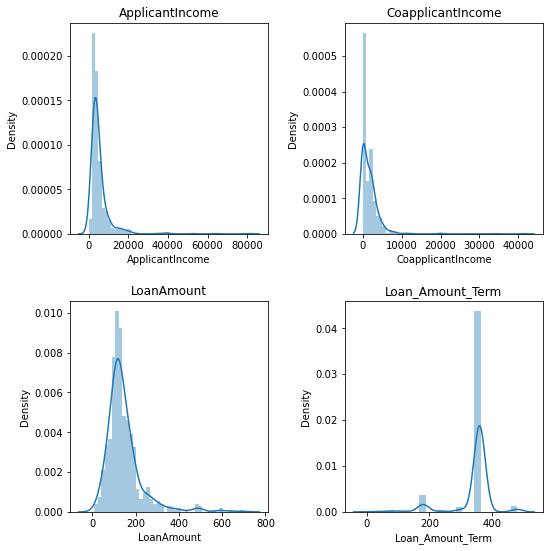

In [19]:
plt.figure(figsize=(8,8))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.tight_layout(pad=2,h_pad=2)
    plt.subplot(2,2,index+1)
    sns.distplot(data[i])
    plt.title(i)

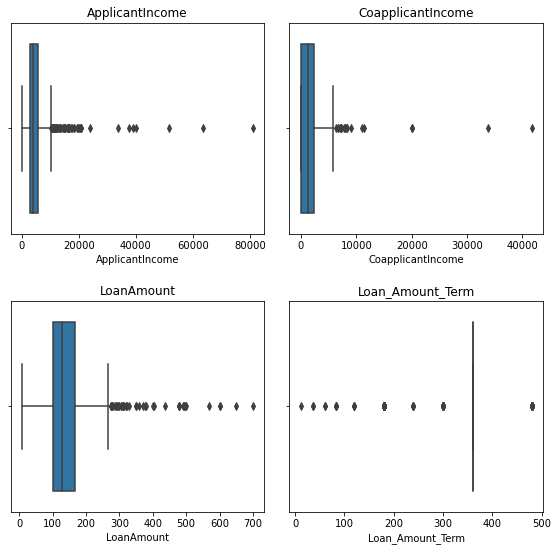

In [20]:
plt.figure(figsize=(8,8))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.tight_layout(pad=2,h_pad=2)
    plt.subplot(2,2,index+1)
    sns.boxplot(data[i])
    plt.title(i)

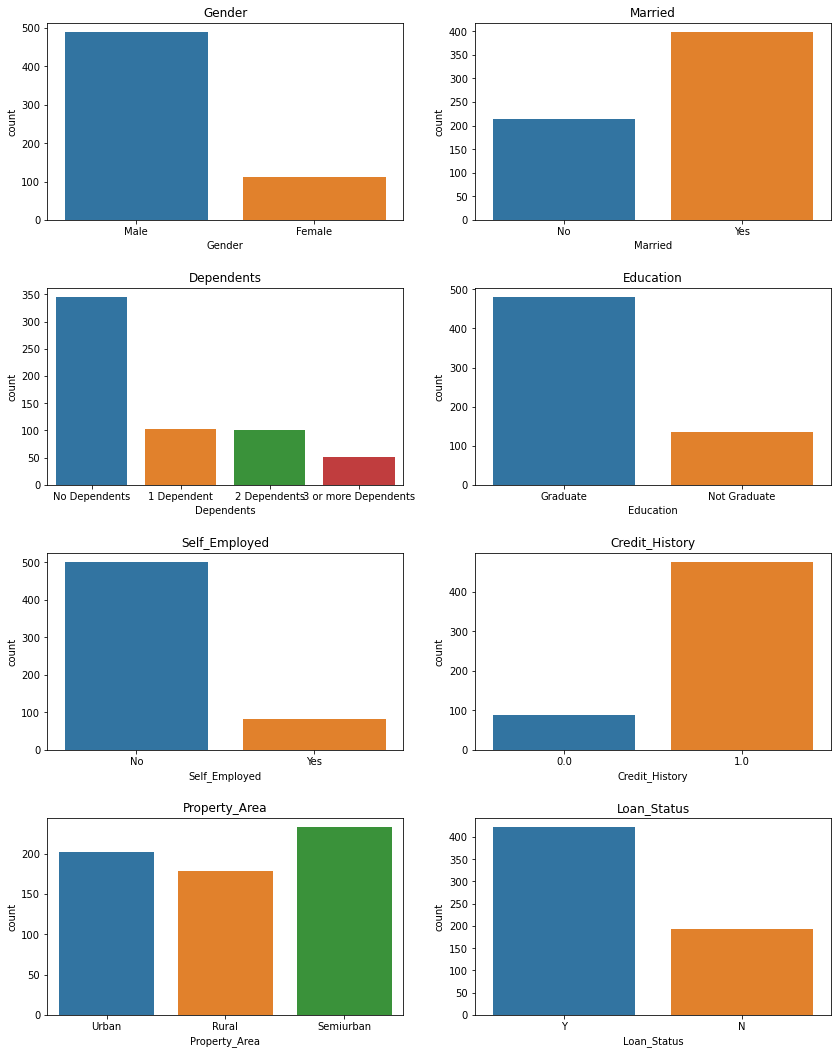

In [21]:
plt.figure(figsize=(12,15))
for index,i in enumerate(data.select_dtypes(include=np.object).columns):
    plt.tight_layout(pad=2,h_pad=2)
    plt.subplot(4,2,index+1)
    sns.countplot(data[i])
    plt.title(i)

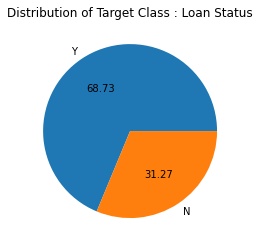

In [22]:
proportions = data.Loan_Status.value_counts(1)
labels = data.Loan_Status.value_counts().index
plt.pie(proportions,labels = labels,autopct="%1.2f")
plt.title("Distribution of Target Class : Loan Status")
plt.show()

#### Inferences - 
- Except loan amount term, all other numeric features i.e loan amount, applicant and coapplicant incomes seem to be positively skewed, with the presence of outliers across all.
- The median duration of loan amount is around 1 year.
- The median amount of loan granted to most individuals is around 120-140k.
- The median income of the primary applicants is close to 35-50k whereas that of co-applicant is close to 5k.
- We have predominant representation of males in this dataset
- No. of married applicants is double the no. of unmarried.
- More than half of the applicants have no dependents.
- Close to 80% of applicants are graduates.
- Only close to 20% applicants are self employed.
- Amongst areas from where applicants come, we have majority coming from semi-urban areas i.e close to 250.
- Around 500 applicants have a credit history of 1 (assumed to be good)

### Bi-variate Analysis

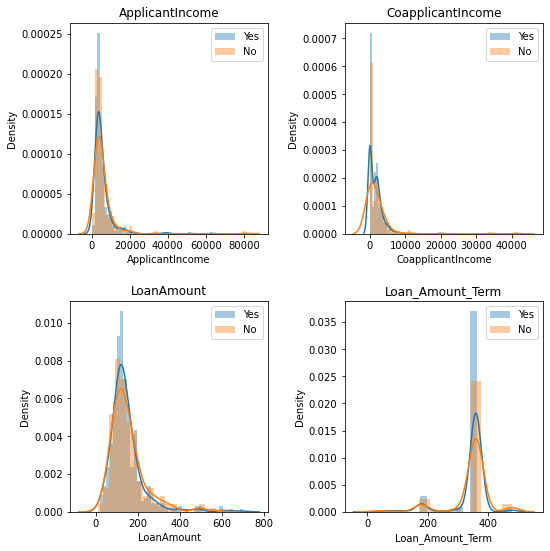

In [23]:
plt.figure(figsize=(8,8))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.tight_layout(pad=2,h_pad=2)
    plt.subplot(2,2,index+1)
    sns.distplot(data[data.Loan_Status=="Y"][i],label="Yes")
    sns.distplot(data[data.Loan_Status=="N"][i],label="No")
    plt.title(i)
    plt.legend()

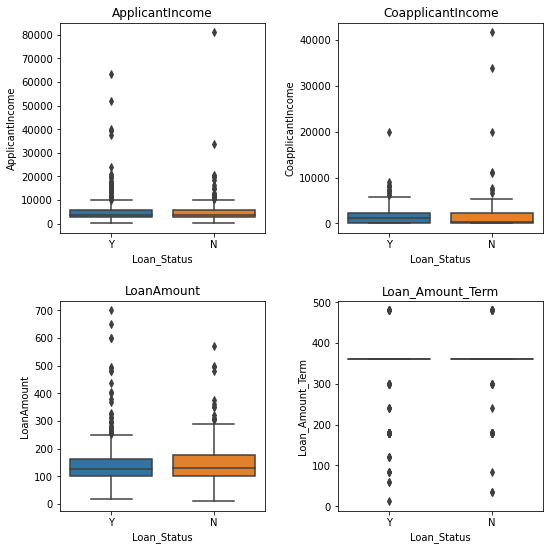

In [24]:
plt.figure(figsize=(8,8))
for index,i in enumerate(data.select_dtypes(include=np.number).columns):
    plt.tight_layout(pad=2,h_pad=2)
    plt.subplot(2,2,index+1)
    sns.boxplot(y=data[i],x=data.Loan_Status)
    plt.title(i)

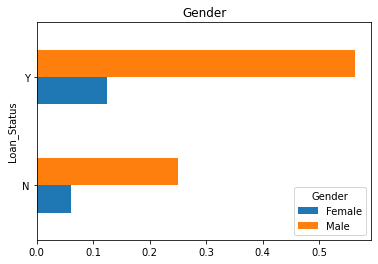

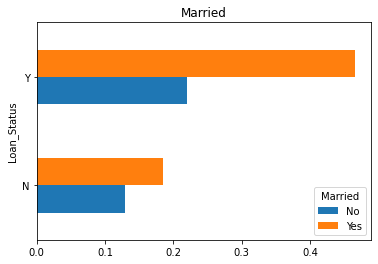

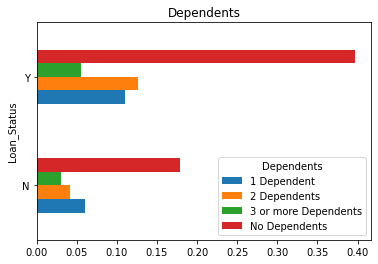

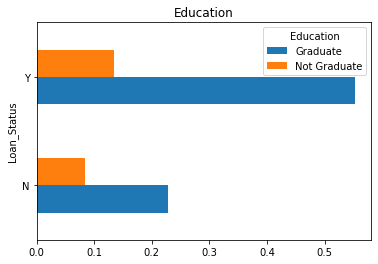

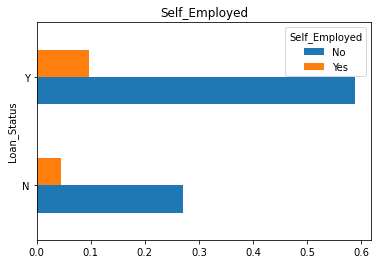

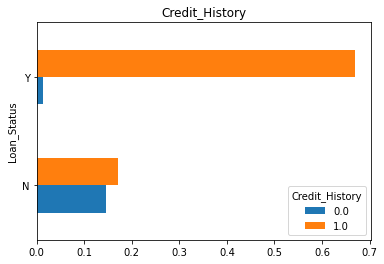

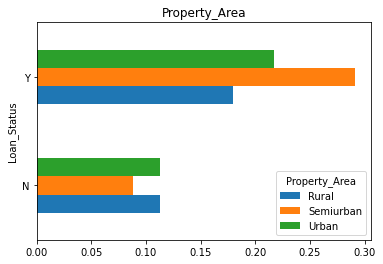

In [25]:
for index,i in enumerate(data.select_dtypes(include=np.object).columns[:-1]):
    pd.crosstab(data.Loan_Status,columns=data[i],normalize=True).plot(kind="barh")
    plt.title(i)
    plt.show()

#### Inferences - 
- Based on comparison of rejected and approved customers across features such as loan amount, loan amount term, applicant and co-applicant income, we cannot make any differentiation between the.
- This is giving us the idea that numerical features might not be useful for this case.
- The % of rejected applicants with 1 dependent is more than % of approved applicant with 1 dependent.
- Amongst rejected applicants, more no. of applicants come from rural and urban areas than semi-urban whereas amongst those approved, % of customers from semi-urban is high.
- Amongst those whose loan requests were rejected, there is a very high proportion of those with credit history of 0 compared to the small proportion amongst approved customers.

### Multivariate Analysis

<AxesSubplot:>

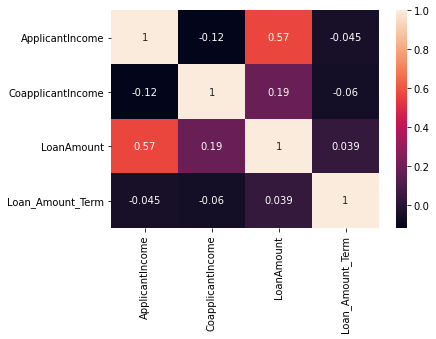

In [26]:
sns.heatmap(data.corr(),annot=True)

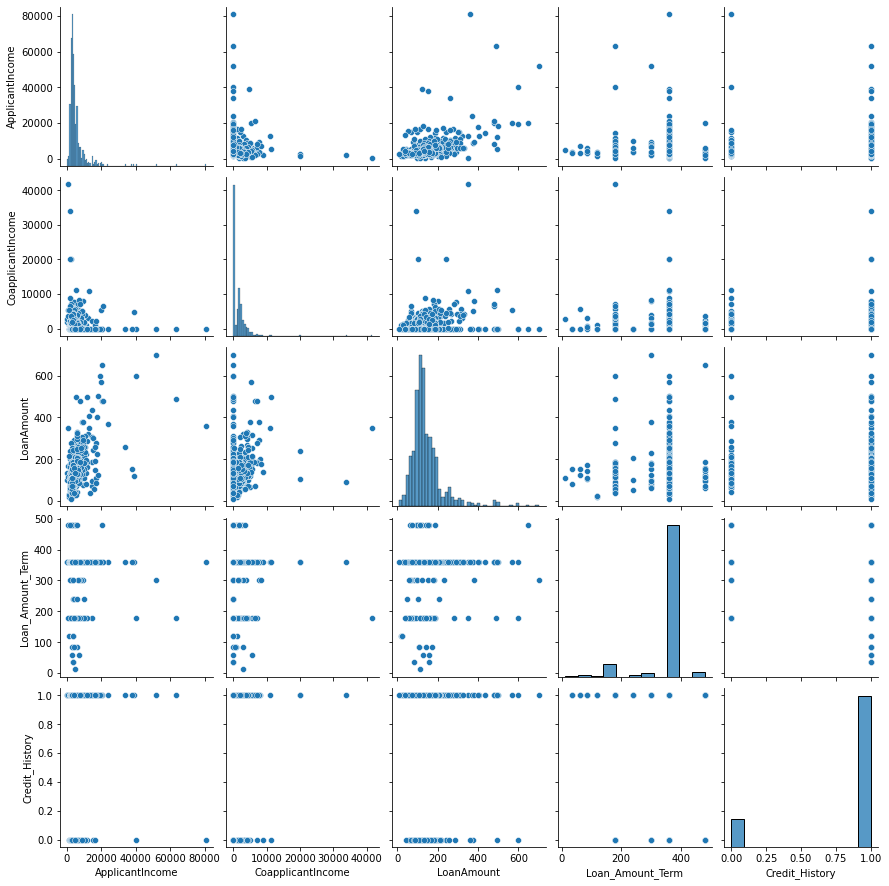

In [27]:
sns.pairplot(data)

#### Inferences - 
- Based on pairplots, we see not multicollinearity
- Based on correlation, we only see a moderate + relationship between applicant income and loan amount i.e 0.57

# Preprocessing

In [28]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop("Loan_Status",axis=1)
y = data.Loan_Status.replace({"Y":0,"N":1})

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=20,stratify=y)
ytrain.index = range(len(xtrain))
ytest.index = range(len(xtest))

### Missing Value Imputation

In [31]:
## Missing values in numerical features
xtrain.select_dtypes(include=np.number).isnull().sum() / len(xtrain) * 100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           4.276986
Loan_Amount_Term     2.036660
dtype: float64

In [32]:
## Missing values in categorical features
xtrain.select_dtypes(include=np.object).isnull().sum() / len(data) * 100

Gender            1.954397
Married           0.488599
Dependents        2.280130
Education         0.000000
Self_Employed     3.745928
Credit_History    5.700326
Property_Area     0.000000
dtype: float64

In [33]:
from xverse.transformer import WOE
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder, PowerTransformer

**We will create a new feature - total income of applicants**

In [34]:
xtrain["Totalincome"] = xtrain.ApplicantIncome + xtrain.CoapplicantIncome
xtest["Totalincome"] = xtest.ApplicantIncome + xtest.CoapplicantIncome

**In order to impute values for missing data in categorical features, we will use Weight of Evidence method i.e woe. This method is useful in loan approval, bank fraud detection and other critical banking applications. This will calculate a value for the missing values and map it.**

**Performing woe will also take care of encoding for the later stages**

**To perform woe we need to convert out categorical features to numerical using encoding**

In [35]:
num_cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]

In [36]:
xtrain_copy = xtrain.copy()
for i in xtrain.drop(num_cols,axis=1).columns:
    le = LabelEncoder().fit(xtrain[i])
    xtrain[i] = le.transform(xtrain[i])
    xtest[i] = le.transform(xtest[i])

In [37]:
df = WOE()
df.fit(xtrain.drop(num_cols,axis=1),ytrain)

WOE(mono_custom_binning={'Credit_History': array([0, 1, 2]),
                         'Dependents': array([0, 1, 2, 3, 4]),
                         'Education': array([0, 1]), 'Gender': array([0, 1, 2]),
                         'Married': array([0, 1, 2]),
                         'Property_Area': array([0, 1, 2]),
                         'Self_Employed': array([0, 1, 2])},
    woe_bins={'Credit_History': {0.0: 0.13906525162789457,
                                 1.0: -0.0710191021434166,
                                 2.0: 0.4509615822002701},
              'Dependents': {0.0: -0.007...
                            1.0: 0.06683874757387825},
              'Gender': {0.0: -0.3409500130320876, 1.0: 0.06487813737449136,
                         2.0: 0.3754540296921249},
              'Married': {0.0: -0.0399614092692075, 1.0: -0.018837777817914212,
                          2.0: 0.0},
              'Property_Area': {0.0: 0.01819102340183818,
                                1.0: -0.0

In [38]:
xtrain = df.transform(xtrain)
xtest = df.transform(xtest)

In [39]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalincome
189,0.064878,-0.018838,0.026636,-0.018712,-0.071821,9328,0.0,188,180,-0.071019,0.018191,9328.0
230,0.064878,-0.018838,-0.007538,-0.018712,-0.071821,2491,2054.0,104,360,-0.071019,-0.030011,4545.0
76,0.064878,-0.039961,0.026636,-0.018712,-0.071821,3750,4750.0,176,360,-0.071019,0.017242,8500.0
545,0.064878,-0.018838,0.026636,-0.018712,-0.071821,2768,1950.0,155,360,-0.071019,0.018191,4718.0
177,0.064878,-0.018838,-0.058182,-0.018712,-0.071821,5516,11300.0,495,360,0.139065,-0.030011,16816.0


In [40]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalincome
541,-0.340950,-0.039961,0.026636,-0.018712,-0.071821,2138,0.0,99,360,0.139065,-0.030011,2138.0
602,0.064878,-0.018838,-0.058182,-0.018712,-0.071821,5703,0.0,128,360,-0.071019,0.017242,5703.0
66,0.064878,-0.039961,0.026636,0.066839,-0.071821,3200,2254.0,126,180,0.139065,0.017242,5454.0
392,0.064878,-0.018838,0.026636,-0.018712,-0.071821,2583,2115.0,120,360,0.450962,0.017242,4698.0
391,0.064878,-0.018838,-0.058182,-0.018712,-0.071821,9504,0.0,275,360,-0.071019,0.018191,9504.0


In [41]:
ytrain.replace({1:"N",0:"Y"},inplace=True)
ytest.replace({1:"N",0:"Y"},inplace=True)

In [42]:
xtest["Loan_Amount_Term"].replace({"NA":np.nan},inplace=True)
xtrain["Loan_Amount_Term"].replace({"NA":np.nan},inplace=True)
xtest["LoanAmount"].replace({"NA":np.nan},inplace=True)
xtrain["LoanAmount"].replace({"NA":np.nan},inplace=True)

**In order to impute the missing values in numerical features, we will use simple imputer with the median strategy since our data is skewed and % of data missing is very low**

In [43]:
SI = SimpleImputer(strategy="median").fit(xtrain[["LoanAmount","Loan_Amount_Term"]])
xtrain[["LoanAmount","Loan_Amount_Term"]] = SI.transform(xtrain[["LoanAmount","Loan_Amount_Term"]])
xtest[["LoanAmount","Loan_Amount_Term"]] = SI.transform(xtest[["LoanAmount","Loan_Amount_Term"]])

In [44]:
xtrain.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Totalincome          0
dtype: int64

In [45]:
xtrain.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Totalincome          0
dtype: int64

In [46]:
xtest.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Totalincome          0
dtype: int64

### Transformation

**Due to outliers being far from the median, we cannot try capping. Also since proportion of outliers looks high, we cannot drop those outliers. Hence we will transform the data**

In [47]:
PT = PowerTransformer().fit(xtrain[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]])
xtrain[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]] = PT.transform(xtrain[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]])
xtest[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]] = PT.transform(xtest[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]])

In [48]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalincome
189,0.064878,-0.018838,0.026636,-0.018712,-0.071821,1.321841,-1.142771,0.802414,-2.239032,-0.071019,0.018191,1.004627
230,0.064878,-0.018838,-0.007538,-0.018712,-0.071821,-0.788304,0.812101,-0.419425,0.197256,-0.071019,-0.030011,-0.377103
76,0.064878,-0.039961,0.026636,-0.018712,-0.071821,-0.127154,1.113562,0.663007,0.197256,-0.071019,0.017242,0.850053
545,0.064878,-0.018838,0.026636,-0.018712,-0.071821,-0.617251,0.794110,0.396790,0.197256,-0.071019,0.018191,-0.293814
177,0.064878,-0.018838,-0.058182,-0.018712,-0.071821,0.490454,1.448421,2.945360,0.197256,0.139065,-0.030011,1.847899


In [49]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalincome
541,-0.340950,-0.039961,0.026636,-0.018712,-0.071821,-1.036994,-1.142771,-0.518125,0.197256,0.139065,-0.030011,-2.394589
602,0.064878,-0.018838,-0.058182,-0.018712,-0.071821,0.543535,-1.142771,0.001546,0.197256,-0.071019,0.017242,0.108063
66,0.064878,-0.039961,0.026636,0.066839,-0.071821,-0.382704,0.844471,-0.030667,-2.239032,0.139065,0.017242,0.016494
392,0.064878,-0.018838,0.026636,-0.018712,-0.071821,-0.729419,0.822269,-0.130170,0.197256,0.450962,0.017242,-0.303215
391,0.064878,-0.018838,-0.058182,-0.018712,-0.071821,1.351221,-1.142771,1.622517,0.197256,-0.071019,0.018191,1.034939


In [50]:
xtrain.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Totalincome          0
dtype: int64

In [51]:
xtest.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Totalincome          0
dtype: int64

# Model Building

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

### Building Baseline models.

**LINEAR REGRESSION**

In [53]:
lr = LogisticRegression().fit(xtrain,ytrain)
print("Train score:",lr.score(xtrain,ytrain))
print(classification_report(ytest,lr.predict(xtest)))

Train score: 0.6802443991853361
              precision    recall  f1-score   support

           N       0.17      0.05      0.08        38
           Y       0.68      0.88      0.77        85

    accuracy                           0.63       123
   macro avg       0.42      0.47      0.42       123
weighted avg       0.52      0.63      0.55       123



**SUPPORT VECTOR CLASSIFIER (SVC)**

In [54]:
svc = SVC().fit(xtrain,ytrain)
print("Train score:",svc.score(xtrain,ytrain))
print(classification_report(ytest,svc.predict(xtest)))

Train score: 0.7128309572301426
              precision    recall  f1-score   support

           N       0.50      0.05      0.10        38
           Y       0.70      0.98      0.81        85

    accuracy                           0.69       123
   macro avg       0.60      0.51      0.45       123
weighted avg       0.64      0.69      0.59       123



**DECISION TREE**

In [55]:
dt = DecisionTreeClassifier().fit(xtrain,ytrain)
print("Train score:",dt.score(xtrain,ytrain))
print(classification_report(ytest,dt.predict(xtest)))

Train score: 1.0
              precision    recall  f1-score   support

           N       0.57      0.61      0.59        38
           Y       0.82      0.80      0.81        85

    accuracy                           0.74       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.74      0.74      0.74       123



**RANDOM FOREST**

In [56]:
rf = RandomForestClassifier().fit(xtrain,ytrain)
print("Train score:",rf.score(xtrain,ytrain))
print(classification_report(ytest,rf.predict(xtest)))

Train score: 1.0
              precision    recall  f1-score   support

           N       0.62      0.61      0.61        38
           Y       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



**AdaBOOST CLASSIFIER**

In [57]:
ada = AdaBoostClassifier().fit(xtrain,ytrain)
print("Train score:",ada.score(xtrain,ytrain))
print(classification_report(ytest,ada.predict(xtest)))

Train score: 0.8370672097759674
              precision    recall  f1-score   support

           N       0.61      0.53      0.56        38
           Y       0.80      0.85      0.82        85

    accuracy                           0.75       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.74      0.75      0.74       123



**XGB CLASSIER**

In [58]:
xgb = XGBClassifier().fit(xtrain,ytrain)
print("Train score:",xgb.score(xtrain,ytrain))
print(classification_report(ytest,xgb.predict(xtest)))

[23:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 1.0
              precision    recall  f1-score   support

           N       0.61      0.58      0.59        38
           Y       0.82      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.75      0.76      0.75       123



#### Inferences - 
- Based on the problem statement and required metric to be looked at, it can be conclude that decision tree and all ensemble techniques are giving good accuracies around 0.73-0.76.
- We can choose them and tune their parameters for better performance

# Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

**DECISION TREE**

In [60]:
# params = {
#     "criterion":["gini","entropy"],
#     "max_depth":range(2,20),
#     "min_samples_leaf":range(2,11),
#     "min_samples_split":range(5,16),
#     "class_weight":["balanced",None]
# }

# dt_grid = DecisionTreeClassifier()
# grid_dt = GridSearchCV(dt_grid,param_grid=params,cv=3,scoring="accuracy").fit(xtrain,ytrain)
# grid_dt.best_params_

In [61]:
dt_tuned = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=8,min_samples_split=5,max_depth=2).fit(xtrain,ytrain)
print("Train score:",dt_tuned.score(xtrain,ytrain))
print(classification_report(ytest,dt_tuned.predict(xtest)))

Train score: 0.8085539714867617
              precision    recall  f1-score   support

           N       0.89      0.45      0.60        38
           Y       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123



**XGB**

In [62]:
# params = {
#     "learning_rate":[0.05,0.10,0.15,0.20,0.25],
#     "max_depth":[3,4,5,6],
#     "gamma":[0.1,0.2,0.3,0.4,0.5],
#     "colsample_bytree":[0.3,0.4,0.5]
# }

# xgb_grid = XGBClassifier()
# grid = GridSearchCV(xgb_grid,param_grid=params,cv=3,scoring="accuracy").fit(xtrain,ytrain)
# grid.best_params_

In [63]:
xgb_tuned = XGBClassifier(colsample_bytree=0.4,gamma=0.3,learning_rate=0.05,max_depth=3).fit(xtrain,ytrain)
print("Train score:",xgb_tuned.score(xtrain,ytrain))
print(classification_report(ytest,xgb_tuned.predict(xtest)))

[23:21:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 0.8309572301425662
              precision    recall  f1-score   support

           N       0.82      0.47      0.60        38
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



**ADABOOSTING**

In [64]:
# params = {
#     "learning_rate":[0.05,0.10,0.15,0.20,0.25],
#     "n_estimators":[50,75,100,125,150]}

# ada = AdaBoostClassifier()
# grid = GridSearchCV(ada,param_grid=params,cv=3,scoring="accuracy").fit(xtrain,ytrain)
# grid.best_params_

In [65]:
ada_tuned = AdaBoostClassifier(learning_rate=0.2,n_estimators=125).fit(xtrain,ytrain)
print("Train score:",ada_tuned.score(xtrain,ytrain))
print(classification_report(ytest,ada_tuned.predict(xtest)))

Train score: 0.8268839103869654
              precision    recall  f1-score   support

           N       0.72      0.47      0.57        38
           Y       0.80      0.92      0.85        85

    accuracy                           0.78       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



**RANDOM FOREST**

In [66]:
# params = {
#     "n_estimators":[75,100,125],
#     "criterion":["gini","entropy"],
#     "max_depth":[3,4,5],
#     "min_samples_leaf":[2,4,6],
#     "class_weight":["balanced",None]
# }

# rf_grid = RandomForestClassifier()
# grid_rf = GridSearchCV(rf_grid,param_grid=params,cv=3,scoring="accuracy").fit(xtrain,ytrain)
# grid_rf.best_params_

In [67]:
rf_tuned = RandomForestClassifier(n_estimators=75,max_depth=4,min_samples_leaf=4,criterion="entropy").fit(xtrain,ytrain)
print("Train score:",rf_tuned.score(xtrain,ytrain))
print(classification_report(ytest,rf_tuned.predict(xtest)))

Train score: 0.8289205702647657
              precision    recall  f1-score   support

           N       0.75      0.47      0.58        38
           Y       0.80      0.93      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.70      0.72       123
weighted avg       0.78      0.79      0.77       123



#### Inferences - 
- We tuned several parameters across different models like Decision Tree, Random Forest, Adaboost and XGB boost. 
- Our accuracy scores are touching 0.79 to 0.81 with 0.81 appearing for decision tree
- We will now try stacking all these models and see if we get a better prediction

## Stacking Techniques

In [68]:
from sklearn.ensemble import StackingClassifier , VotingClassifier

**VOTING CLASSIER**

In [69]:
rf_stack = RandomForestClassifier(n_estimators=75,max_depth=4,min_samples_leaf=4,criterion="entropy")
dt_stack = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=8,min_samples_split=5,max_depth=2)
xgb_stack = XGBClassifier(colsample_bytree=0.4,gamma=0.3,learning_rate=0.05,max_depth=3)
ada_stack = AdaBoostClassifier(learning_rate=0.2,n_estimators=125)
vote = VotingClassifier([("rf",rf_stack),("dt",dt_stack),("xgb",xgb_stack),("ada",ada_stack)],voting="hard").fit(xtrain,ytrain)

[23:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
print(classification_report(ytest,vote.predict(xtest)))

              precision    recall  f1-score   support

           N       0.82      0.47      0.60        38
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



**STACKING CLASSIFIER**

In [122]:
stack = StackingClassifier([("rf",rf_stack),("dt",dt_stack),("ada",ada_stack)],final_estimator=xgb_stack).fit(xtrain,ytrain)

[23:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [123]:
print(classification_report(ytest,stack.predict(xtest)))

              precision    recall  f1-score   support

           N       0.81      0.45      0.58        38
           Y       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123



#### Inferences - 
- On using Stacking and voting techniques to combine the decision tree and other ensemble techniques into 1 model, we can observe no change.
- Both stacking and voting supermodels give accuracy of 0.80.

## FEATURE SELECTION - 
#### Using Forward Feature Elimination

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [74]:
# stack = StackingClassifier([("rf",rf_stack),("dt",dt_stack),("ada",ada_stack)],final_estimator=xgb_stack)
# sfs = SequentialFeatureSelector(stack,k_features="best",scoring="accuracy",cv=3).fit(xtrain,ytrain)

[23:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [77]:
# sfs.k_feature_names_

('Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Property_Area',
 'Totalincome')

In [102]:
best_features = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Property_Area',
 'Totalincome']

In [105]:
stack_sfs = StackingClassifier([("rf",rf_stack),("dt",dt_stack),("ada",ada_stack)],final_estimator=xgb_stack).fit(xtrain[list(best_features)],ytrain)

[23:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
print(classification_report(ytest,stack_sfs.predict(xtest[list(sfs.k_feature_names_)])))

              precision    recall  f1-score   support

           N       0.82      0.47      0.60        38
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



#### Inferences -
- On performing feature selection, we can observe that there is no change in accuracy on finding and using the best features for  stacking classifer as they still score 0.80 accuracy on test.
- Hence, we can continue using the stacked supermodel with decision tree, random forest, adaboost and xgb with tuned parameters.

## Get Results on test

In [82]:
test = pd.read_csv("test_lAUu6dG.csv")

In [83]:
ids = test.Loan_ID
test.drop("Loan_ID",axis=1,inplace=True)

### Processing the test data

In [84]:
test.Credit_History = test.Credit_History.astype("object")
for i in test.index:
    if test.loc[i,"Dependents"] == "0":
        test.loc[i,"Dependents"] = "No Dependents"
    elif test.loc[i,"Dependents"] == "1":
        test.loc[i,"Dependents"] = "1 Dependent"
    elif test.loc[i,"Dependents"] == "2":
        test.loc[i,"Dependents"] = "2 Dependents"
    elif test.loc[i,"Dependents"] == "3+":
        test.loc[i,"Dependents"] = "3 or more Dependents"

test[["LoanAmount","Loan_Amount_Term"]] = SI.transform(test[["LoanAmount","Loan_Amount_Term"]])
        
test["Totalincome"] = test.LoanAmount + test.Loan_Amount_Term
for i in test.drop(num_cols,axis=1).columns:
    le = LabelEncoder().fit(xtrain_copy[i])
    test[i] = le.transform(test[i])
test = df.transform(test)
test[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]] = PT.transform(test[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Totalincome"]])
test_copy = test.copy()

In [85]:
## CHECKING MISSING VALUES IN TEST SAMPLE
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Totalincome          0
dtype: int64

In [86]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalincome
0,0.064878,-0.018838,0.026636,-0.018712,-0.071821,0.548272,-1.142771,-0.306509,0.197256,-0.071019,0.017242,-9.227362
1,0.064878,-0.018838,-0.007538,-0.018712,-0.071821,-0.446537,0.704464,-0.030667,0.197256,-0.071019,0.017242,-9.021096
2,0.064878,-0.018838,-0.130655,-0.018712,-0.071821,0.333825,0.766549,1.017699,0.197256,-0.071019,0.017242,-8.099968
3,0.064878,-0.018838,-0.130655,-0.018712,-0.071821,-0.889959,0.887297,-0.498029,0.197256,0.450962,0.017242,-9.361508
4,0.064878,-0.039961,0.026636,0.066839,-0.071821,-0.344822,-1.142771,-0.989250,0.197256,-0.071019,0.017242,-9.672041


In [124]:
## USING THE STACKED MODEL WITH TUNED ESTIMATORS AND BEST FEATURES

output = pd.Series(stack.predict(test))

In [125]:
output.value_counts()

Y    305
N     62
dtype: int64

In [126]:
## SAVING PREDICTIONS IN A DATAFRAME
output = pd.DataFrame({"Loan_ID":ids,"Loan_Status":output})

In [127]:
## SAVING DATAFRAME TO A CSV FILE
output.to_csv("output.csv")

### SCORE ACHIEVED - 77